In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage



In [2]:
image1 = cv2.imread('Images\Checkerboard.png')
image = cv2.imread('Images\Checkerboard.png', 0)

P, Q = image.shape

In [3]:
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")

In [4]:

Ix = ndimage.convolve(image, SOBEL_X, mode='constant', cval=0.0)
Iy = ndimage.convolve(image, SOBEL_Y, mode='constant', cval=0.0)


In [5]:
Ixx = np.square(Ix)
Iyy = np.square(Iy)
Ixy = Ix * Iy
Ixy.shape

(1200, 1200)

In [6]:

Ixx  = ndimage.convolve(Ix, GAUSS, mode='constant', cval=0.0)

Iyy  = ndimage.convolve(Iy, GAUSS, mode='constant', cval=0.0)

Ixy  = ndimage.convolve(Ixy, GAUSS, mode='constant', cval=0.0)


In [7]:
from scipy.ndimage import gaussian_filter
Ixx = gaussian_filter(Ix**2, sigma=2)
Ixy = gaussian_filter(Iy*Ix, sigma=2)
Iyy = gaussian_filter(Iy**2, sigma=2)

In [8]:
detM = Ixx * Iyy - Ixy **2
traceM = Ixx + Iyy
k = 0.05
harris_response = detM - k * traceM ** 2



In [9]:
#img_copy_for_corners = np.copy(image1)
#np.copy(image1)
P, Q = harris_response.shape
img_copy_for_edges = np.zeros([P, Q])
img_copy_for_corners = np.zeros([P,Q])

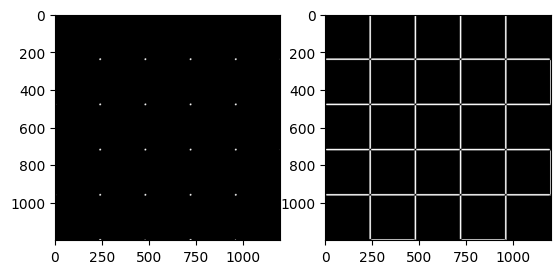

In [10]:
for i in range(P):
    for j in range(Q):
        if harris_response[i][j] > 0:
            img_copy_for_corners[i][j] = 255 #[255, 0, 0]
        elif harris_response[i][j] < 0:
            img_copy_for_edges[i][j] = 255#[255, 0, 0]
plt.subplot(1, 2,1)
plt.imshow(img_copy_for_corners, cmap='gray')
plt.subplot(1, 2,2)
plt.imshow(img_copy_for_edges, cmap='gray')

In [11]:

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            try:
                img_copy_for_edges[rowindex, colindex] = [0,0 ,0]
                img_copy_for_edges[rowindex-1, colindex-1] = [0,0 ,0]
                img_copy_for_edges[rowindex+1, colindex+1] = [0,0 ,0]
            except:
                 IndexError
    


ValueError: setting an array element with a sequence.

In [179]:
x = np.array((
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]), dtype="int32")
y = x

In [178]:
for index_row, row in enumerate(x):
    #print(index_row, row)
    for col_n, i in enumerate(row):
        if i >0:
            x[index_row, col_n] = 255
        else
        #print(col_n, i)

0 [0 1 2]
0 0
1 1
2 2
1 [3 4 5]
0 3
1 4
2 5
2 [6 7 8]
0 6
1 7
2 8


In [12]:
image = cv2.imread('Images/MainBuilding.png')

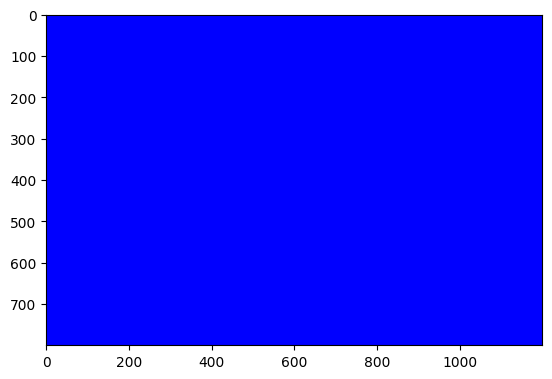

In [17]:


# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)

# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

# the window showing output image with corners
plt.imshow(image)

